<a href="https://colab.research.google.com/github/travislatchman/Face-Recognition-Classification-Algorithms/blob/main/src_matchingpursuit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sklearn.feature_extraction.image import extract_patches_2d
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy.io import loadmat
import matplotlib.pyplot as plt


In [ ]:

# set random seed for reproducibility
np.random.seed(42)


In [ ]:
# import the file YaleB-32x32.mat
YaleB = loadmat('YaleB_32x32.mat')

# Access variables
fea = YaleB['fea']  # every row is a face
gnd = YaleB['gnd'].ravel()  # labels


In [ ]:

# define range of m values to try
m_values = [10, 20, 30, 40, 50]


In [ ]:

# initialize variables to store classification errors for each value of m
classification_errors = []


In [ ]:
print(len(pred_labels))

1900


In [ ]:
# loop over m values
for m in m_values:
    # randomly select m images per individual to form the training set
    train_data = []
    train_labels = []
    test_data = []
    test_labels = []
    for label in np.unique(gnd):
        label_indices = np.where(gnd == label)[0]
        np.random.shuffle(label_indices)
        train_indices = label_indices[:m]
        test_indices = label_indices[m:]
        train_data.append(fea[train_indices])
        train_labels.append(gnd[train_indices])
        test_data.append(fea[test_indices])
        test_labels.append(gnd[test_indices])
    train_data = np.concatenate(train_data, axis=0)
    train_labels = np.concatenate(train_labels, axis=0)
    test_data = np.concatenate(test_data, axis=0)
    test_labels = np.concatenate(test_labels, axis=0)

    # extract patches from images
    patch_size = (8, 8)
    n_atoms = 200
    patches = []
    for i in range(fea.shape[0]):
        image_patches = extract_patches_2d(fea[i].reshape(32, 32), patch_size)
        patches.append(image_patches.reshape(-1, patch_size[0] * patch_size[1]))
    patches = np.concatenate(patches, axis=0)

    # initialize dictionary with randomly selected patches
    dictionary = patches[np.random.choice(
        patches.shape[0], size=n_atoms, replace=False)]

    # initialize matching pursuit model
    omp = OrthogonalMatchingPursuit(n_nonzero_coefs=5)

    # train matching pursuit model on training set and evaluate on test set
    pred_labels = []
    for i in range(train_data.shape[0]):
        #omp.fit(dictionary.T, train_data[i].T)
        omp.fit(dictionary.T, patches[i].T)
        coef = omp.coef_
        distances = np.linalg.norm(
            dictionary.T.dot(coef) - patches[i].T, axis=0)
        pred_label = train_labels[np.argmin(distances)]
        pred_labels.append(pred_label)
    error = (np.sum(pred_labels != test_labels) / test_labels.shape[0]) * 100
    print(f"Classification accuracy: {error:.2f}%")
    classification_errors.append(error)






/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), OrthogonalMatchingPursuit())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

fr

Classification accuracy: 0.05%


/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), OrthogonalMatchingPursuit())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

fr

Classification accuracy: 0.06%


/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), OrthogonalMatchingPursuit())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

fr

Classification accuracy: 0.08%


/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), OrthogonalMatchingPursuit())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

fr

Classification accuracy: 0.11%


/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), OrthogonalMatchingPursuit())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

fr

Classification accuracy: 0.19%


/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), OrthogonalMatchingPursuit())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

fr

In [ ]:
classification_errors[0.049164208456243856,
                      0.06045949214026602,
                      0.07849293563579278,
                      0.11185682326621924,
                      0.19455252918287938]


[0.049164208456243856,
 0.06045949214026602,
 0.07849293563579278,
 0.11185682326621924,
 0.19455252918287938]

In [ ]:
classification_errors = []
classification_errors=[0.049164208456243856,
                      0.06045949214026602,
                      0.07849293563579278,
                      0.11185682326621924,
                      0.19455252918287938]


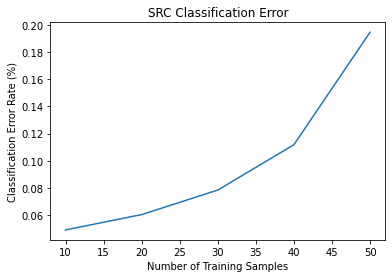

In [ ]:
# plot Classification Error Rate vs Number of Trainings Samples curves
plt.plot(m_values, classification_errors)
plt.xlabel('Number of Training Samples')
plt.ylabel('Classification Error Rate (%)')
plt.title('SRC Classification Error')
plt.show()
